<a href="https://colab.research.google.com/github/Namus03/bitcoinransomware_week2/blob/main/bitcoinransomware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# File paths
features_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/elliptic_txs_features.csv'
classes_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/elliptic_txs_classes.csv'
edgelist_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/elliptic_txs_edgelist.csv'

# Load datasets
features_df = pd.read_csv(features_path, header=None)
classes_df = pd.read_csv(classes_path)
edgelist_df = pd.read_csv(edgelist_path)

# Show basic info
print("Features Dataset:")
print(features_df.shape)
print(features_df.head())

print("\nClasses Dataset:")
print(classes_df.shape)
print(classes_df.head())

print("\nEdgelist Dataset:")
print(edgelist_df.shape)
print(edgelist_df.head())


Features Dataset:
(203769, 167)
         0    1         2         3         4          5         6    \
0  230425980    1 -0.171469 -0.184668 -1.201369  -0.121970 -0.043875   
1    5530458    1 -0.171484 -0.184668 -1.201369  -0.121970 -0.043875   
2  232022460    1 -0.172107 -0.184668 -1.201369  -0.121970 -0.043875   
3  232438397    1  0.163054  1.963790 -0.646376  12.409294 -0.063725   
4  230460314    1  1.011523 -0.081127 -1.201369   1.153668  0.333276   

        7          8         9    ...       157       158       159       160  \
0 -0.113002  -0.061584 -0.162097  ... -0.562153 -0.600999  1.461330  1.461369   
1 -0.113002  -0.061584 -0.162112  ...  0.947382  0.673103 -0.979074 -0.978556   
2 -0.113002  -0.061584 -0.162749  ...  0.670883  0.439728 -0.979074 -0.978556   
3  9.782742  12.414558 -0.163645  ... -0.577099 -0.613614  0.241128  0.241406   
4  1.312656  -0.061584 -0.163523  ... -0.511871 -0.400422  0.517257  0.579382   

        161       162       163       164       

In [5]:
# Rename columns for readability
features_df.rename(columns={0: 'txId', 1: 'time_step'}, inplace=True)
classes_df.columns = ['txId', 'class']
edgelist_df.columns = ['source_txId', 'target_txId']


In [6]:
def explore(df, name):
    print(f"\n--- {name} ---")
    print("Shape:", df.shape)
    print("Data types:\n", df.dtypes)
    print("Missing values:\n", df.isnull().sum())
    print("Duplicate rows:", df.duplicated().sum())
    display(df.describe(include='all').T)


In [7]:
explore(features_df, "Features")
explore(classes_df, "Classes")
explore(edgelist_df, "Edgelist")



--- Features ---
Shape: (203769, 167)
Data types:
 txId           int64
time_step      int64
2            float64
3            float64
4            float64
              ...   
162          float64
163          float64
164          float64
165          float64
166          float64
Length: 167, dtype: object
Missing values:
 txId         0
time_step    0
2            0
3            0
4            0
            ..
162          0
163          0
164          0
165          0
166          0
Length: 167, dtype: int64
Duplicate rows: 0


,count,mean,std,min,25%,50%,75%,max
txId,203769.0,1.711310e+08,1.104655e+08,1076.000000,8.433452e+07,1.624375e+08,2.454798e+08,4.032446e+08
time_step,203769.0,2.384396e+01,1.517217e+01,1.000000,9.000000e+00,2.300000e+01,3.800000e+01,4.900000e+01
2,203769.0,2.454849e-17,1.000002e+00,-0.172983,-1.725317e-01,-1.692045e-01,-1.318553e-01,7.168197e+01
3,203769.0,-7.531922e-18,1.000002e+00,-0.210553,-1.803266e-01,-1.328975e-01,-5.524241e-02,7.359505e+01
4,203769.0,2.231681e-17,1.000002e+00,-1.756361,-1.201369e+00,4.636092e-01,1.018602e+00,2.683580e+00
...,...,...,...,...,...,...,...,...
162,203769.0,2.231681e-18,1.000002e+00,-0.125939,-8.749016e-02,-8.749016e-02,-8.749016e-02,2.518490e+02
163,203769.0,5.244450e-17,1.000002e+00,-0.131155,-1.311553e-01,-1.311553e-01,-8.467423e-02,2.387835e+02
164,203769.0,1.562177e-17,1.000002e+00,-0.269818,-1.405971e-01,-9.752359e-02,-9.752359e-02,1.057340e+02
165,203769.0,4.072817e-17,1.000002e+00,-1.760926,-1.206134e-01,-1.206134e-01,1.520067e-01,1.519700e+00



--- Classes ---
Shape: (203769, 2)
Data types:
 txId      int64
class    object
dtype: object
Missing values:
 txId     0
class    0
dtype: int64
Duplicate rows: 0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
txId,203769.0,NaN,NaN,NaN,171131012.134083,110465455.976947,1076.0,84334516.0,162437519.0,245479839.0,403244581.0
class,203769,3,unknown,157205,NaN,NaN,NaN,NaN,NaN,NaN,NaN



--- Edgelist ---
Shape: (234355, 2)
Data types:
 source_txId    int64
target_txId    int64
dtype: object
Missing values:
 source_txId    0
target_txId    0
dtype: int64
Duplicate rows: 0


,count,mean,std,min,25%,50%,75%,max
source_txId,234355.0,1.612218e+08,1.134457e+08,1076.0,69339669.5,155578198.0,243386127.0,403244581.0
target_txId,234355.0,1.686881e+08,1.110120e+08,1076.0,73429584.0,157581363.0,245407156.5,403244581.0


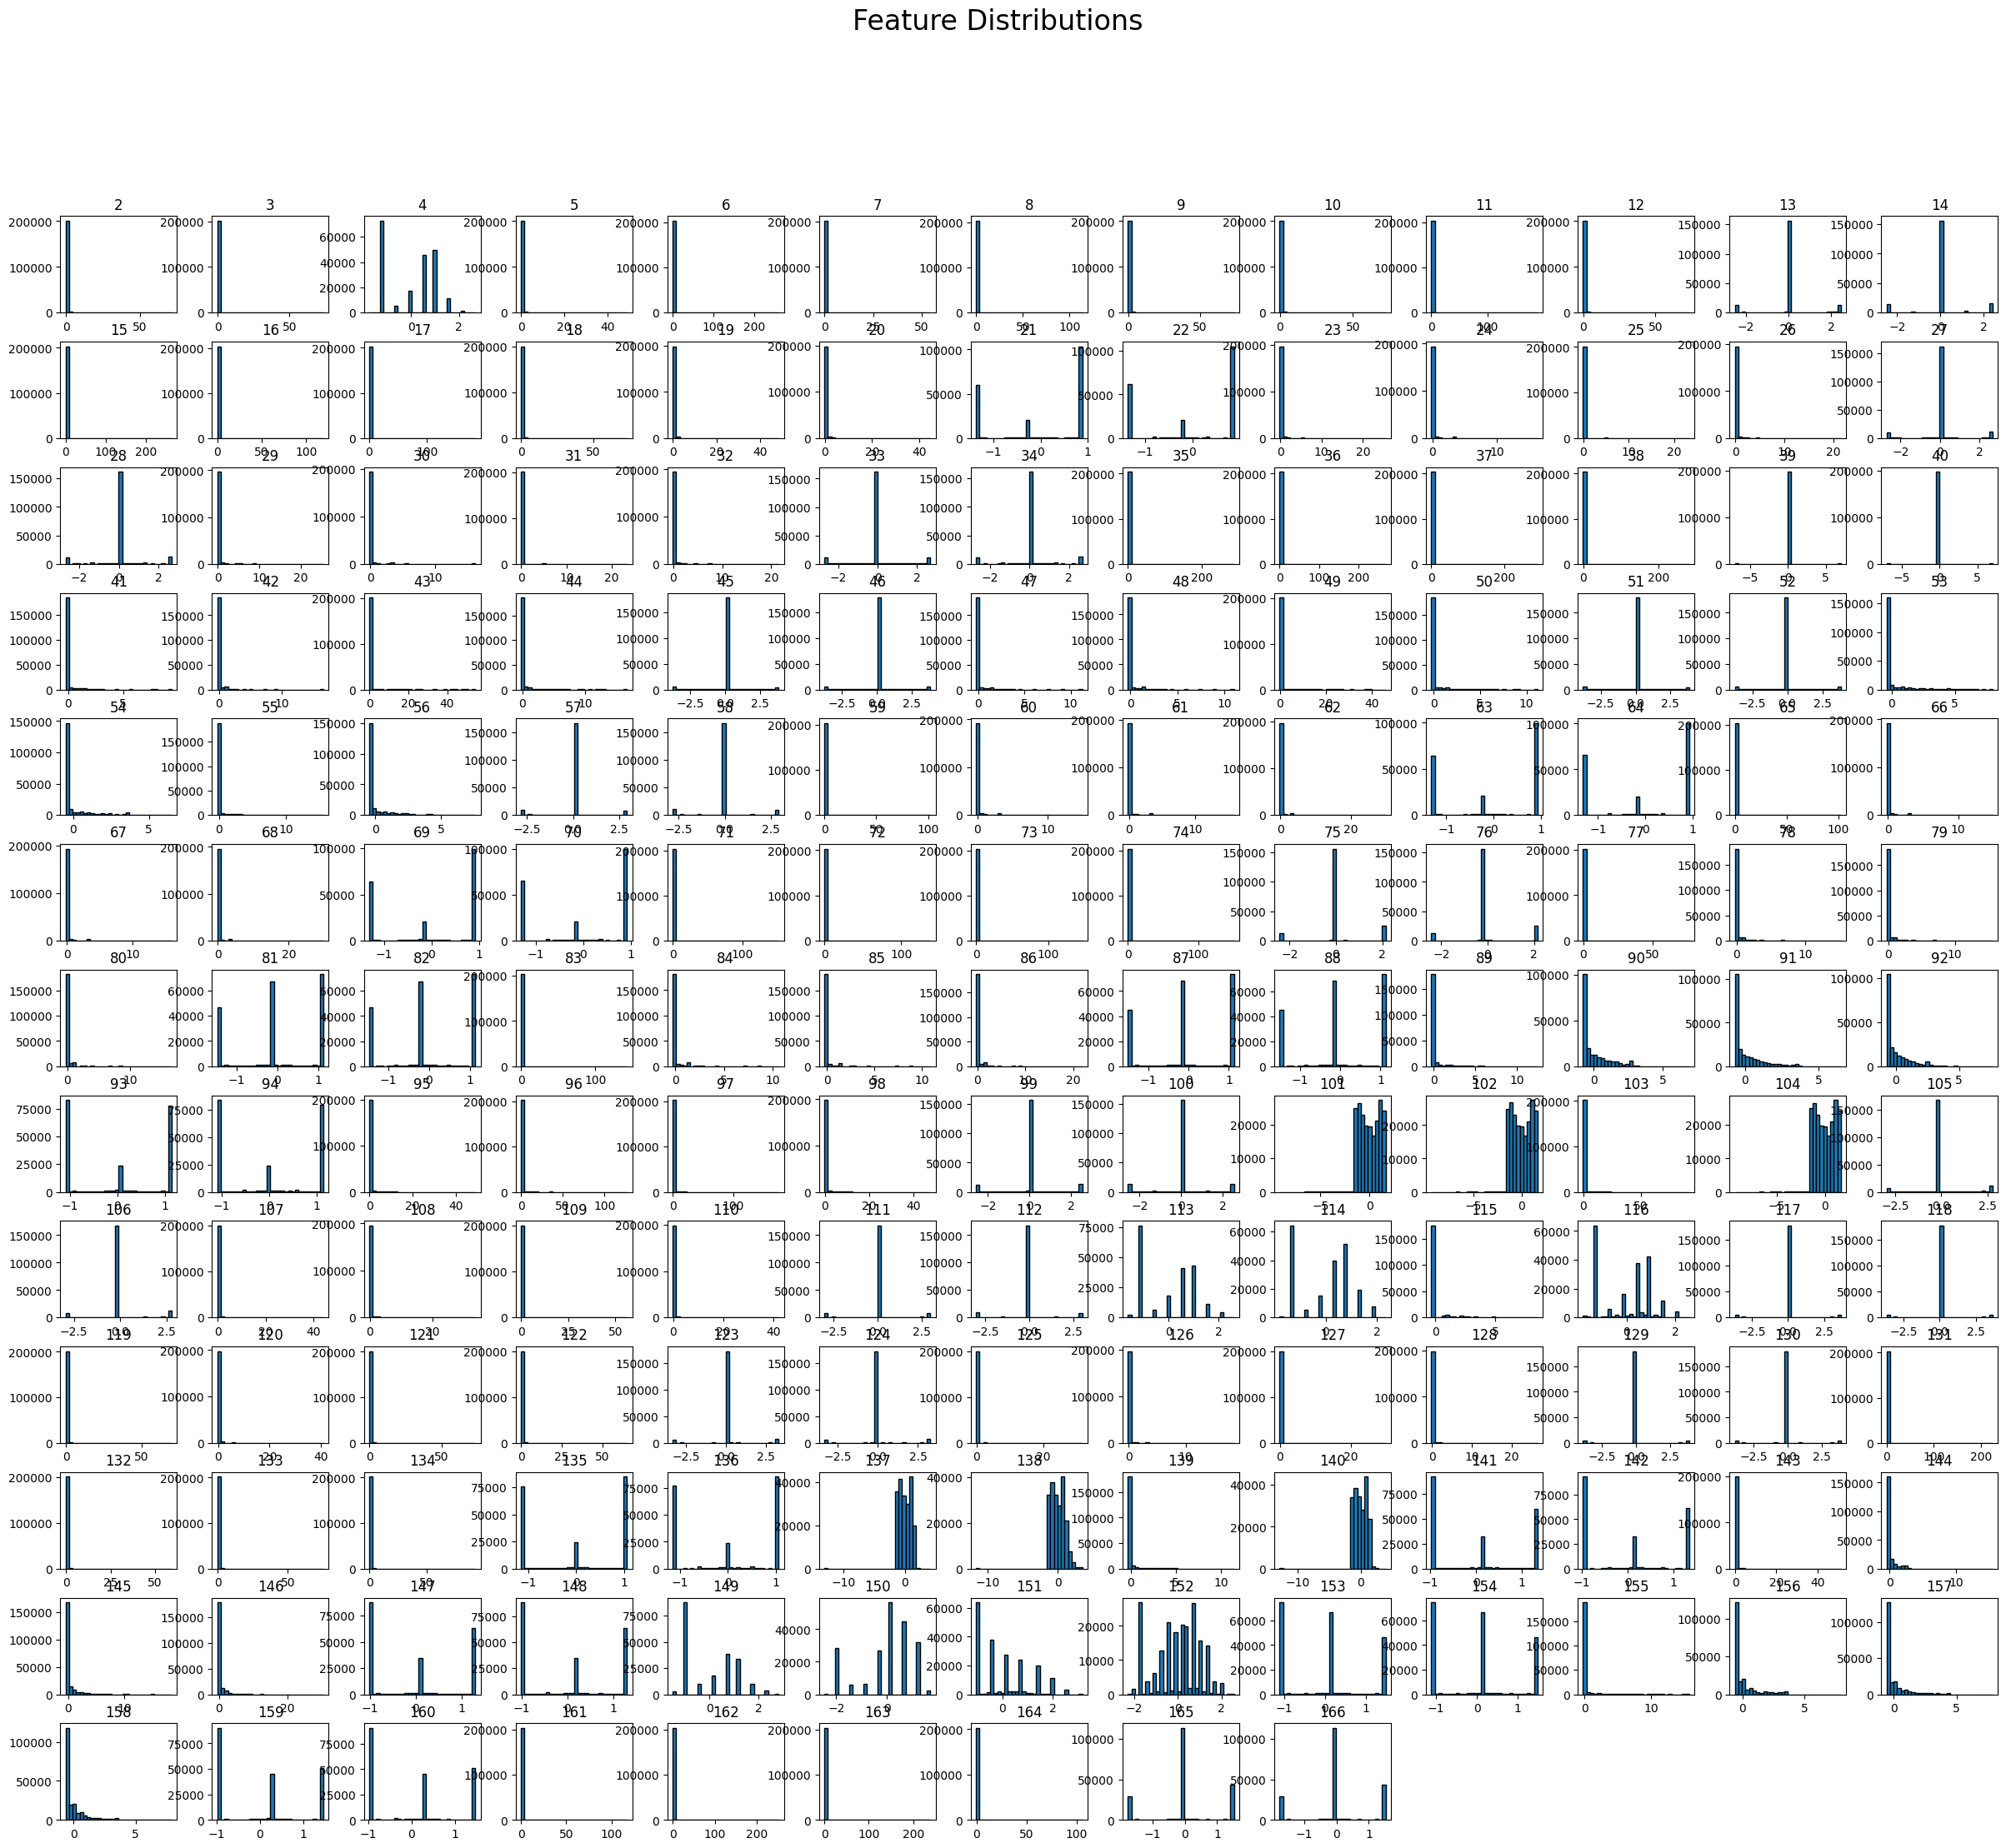

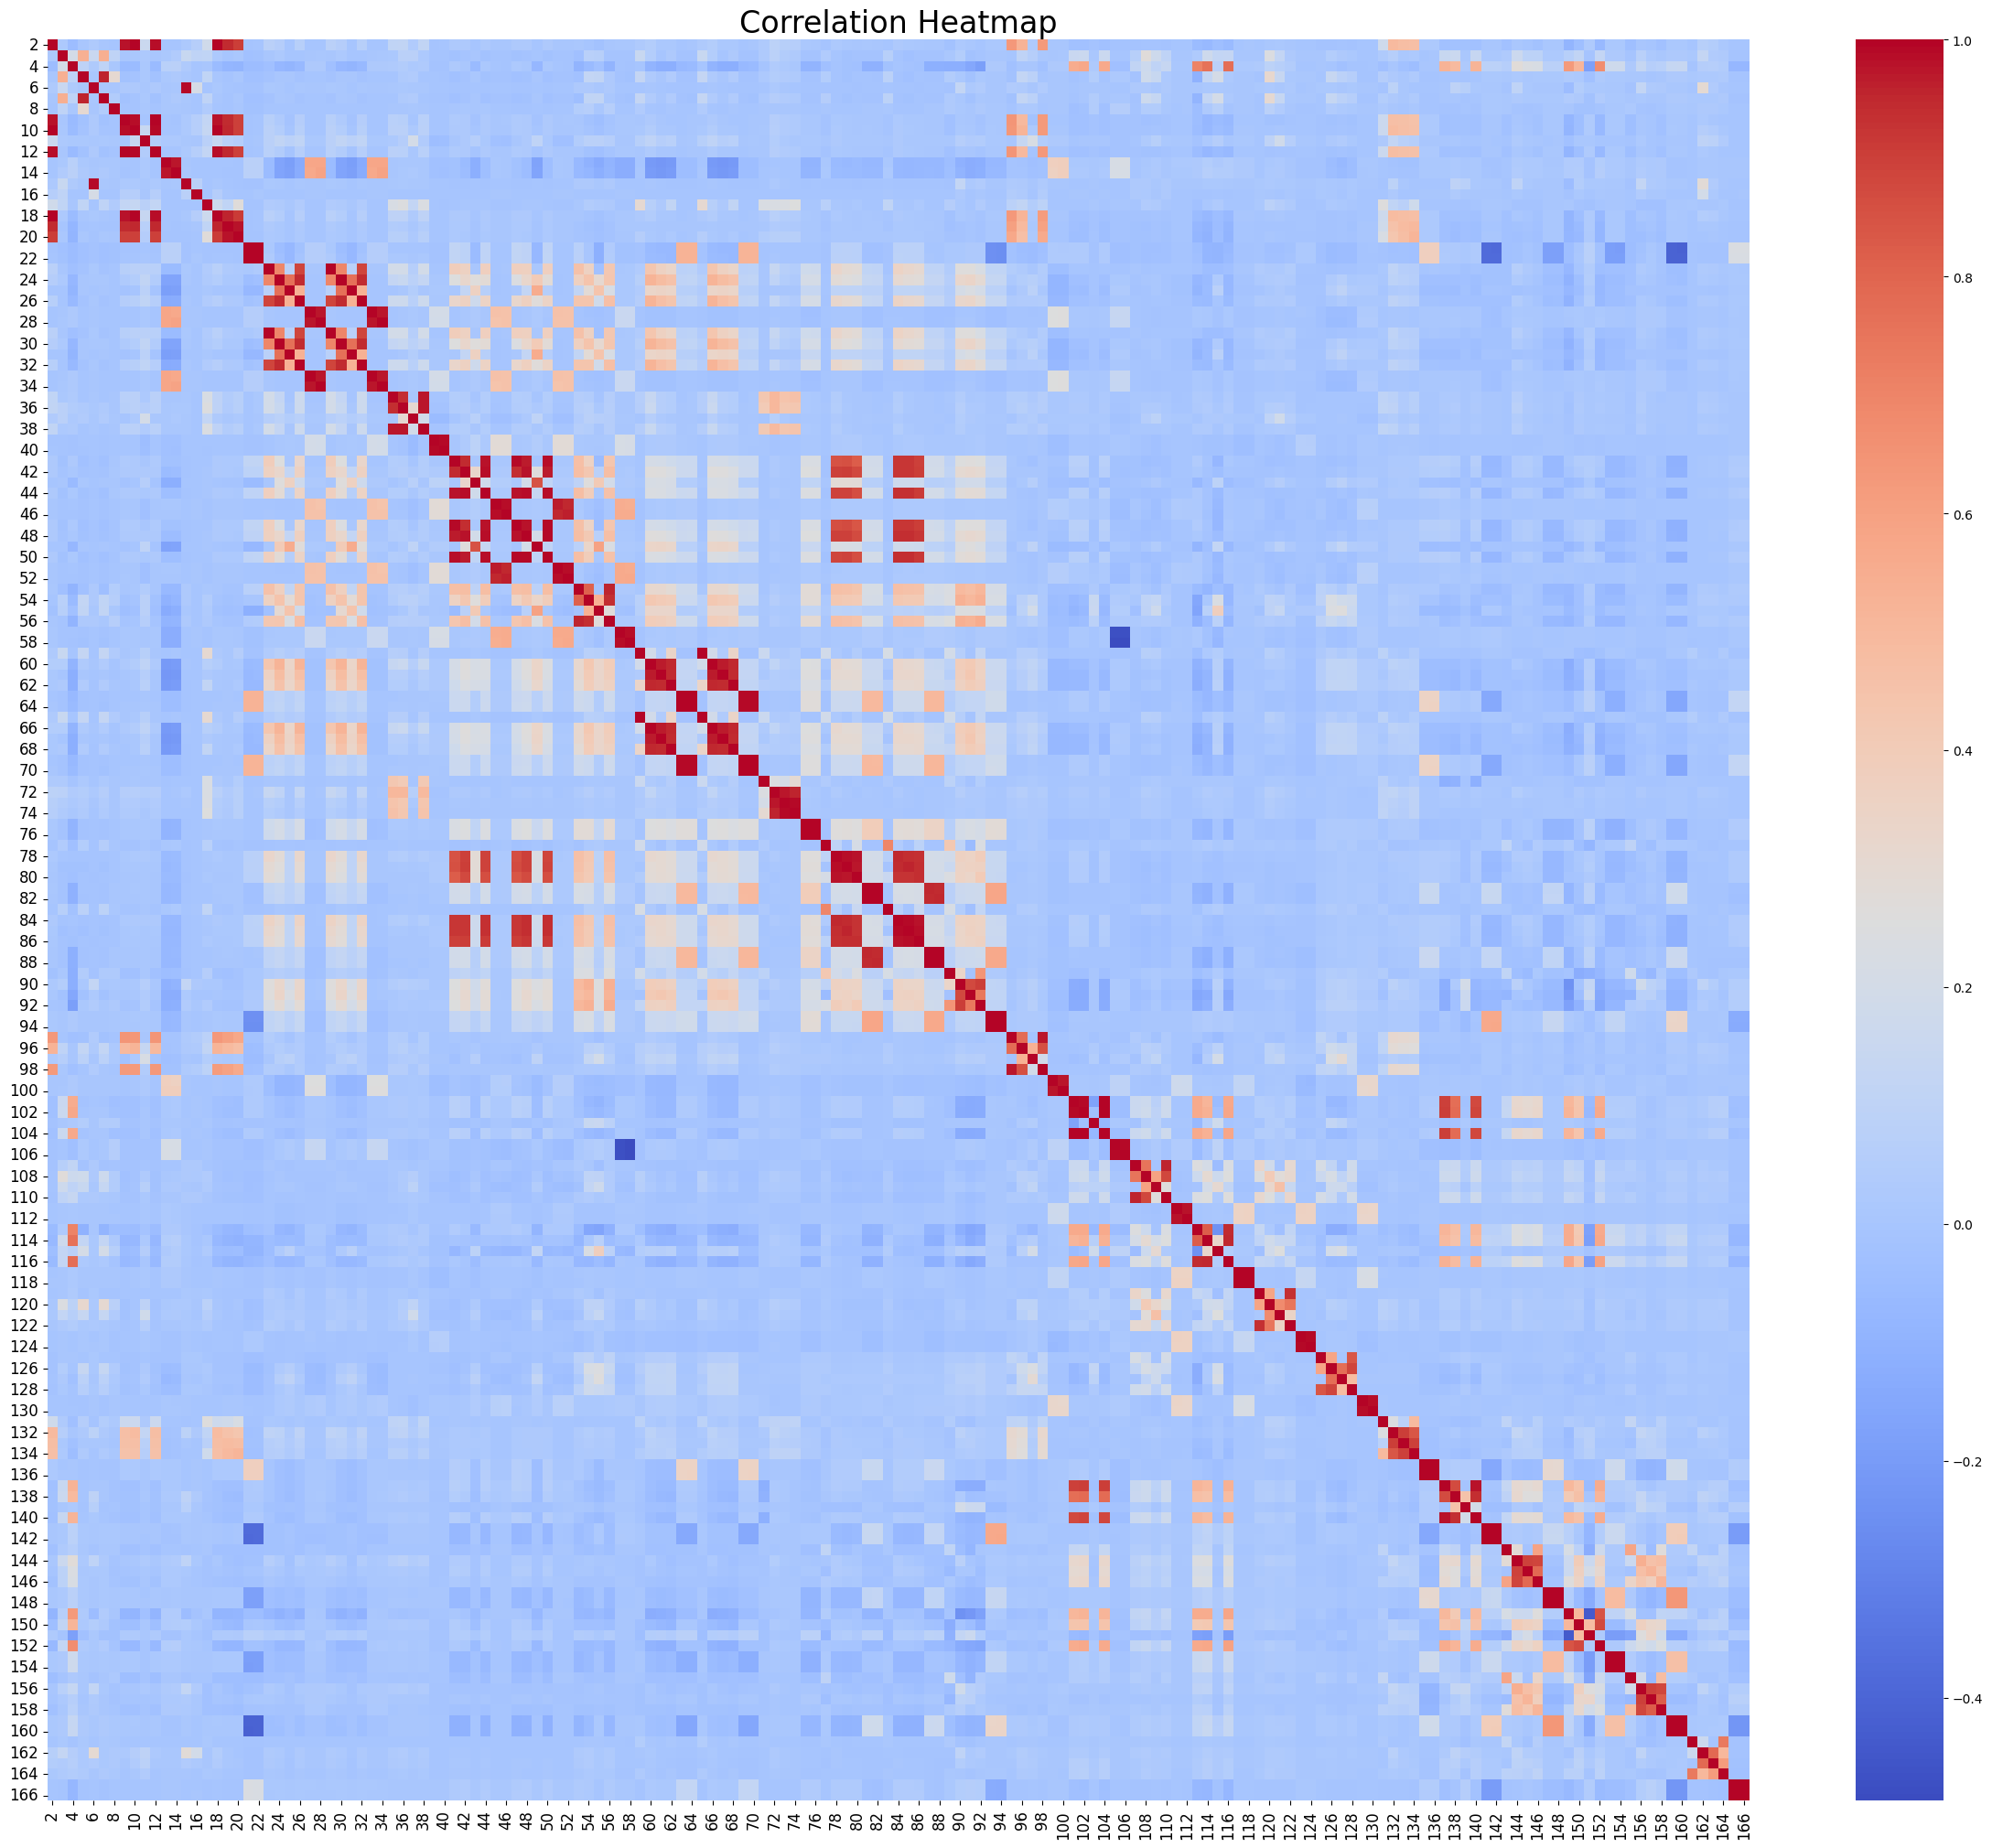

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns
numeric_features = features_df.drop(columns=['txId', 'time_step'])

# 📊 Larger Histogram Plot
numeric_features.hist(
    bins=30,
    figsize=(30, 25),    # Wider and taller figure
    edgecolor='black',
    grid=False
)
plt.suptitle("Feature Distributions", fontsize=24)
plt.show()

# 🔥 Larger Correlation Heatmap
plt.figure(figsize=(30, 25))  # Wider and taller heatmap
sns.heatmap(
    numeric_features.corr(),
    cmap='coolwarm',
    annot=False,
    fmt=".2f",
    cbar=True
)
plt.title("Correlation Heatmap", fontsize=24)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [12]:
# Merge features and class labels using 'txId'
merged_df = pd.merge(features_df, classes_df, on='txId', how='left')


In [13]:
print(merged_df.columns.tolist())


['txId', 'time_step', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 'class']


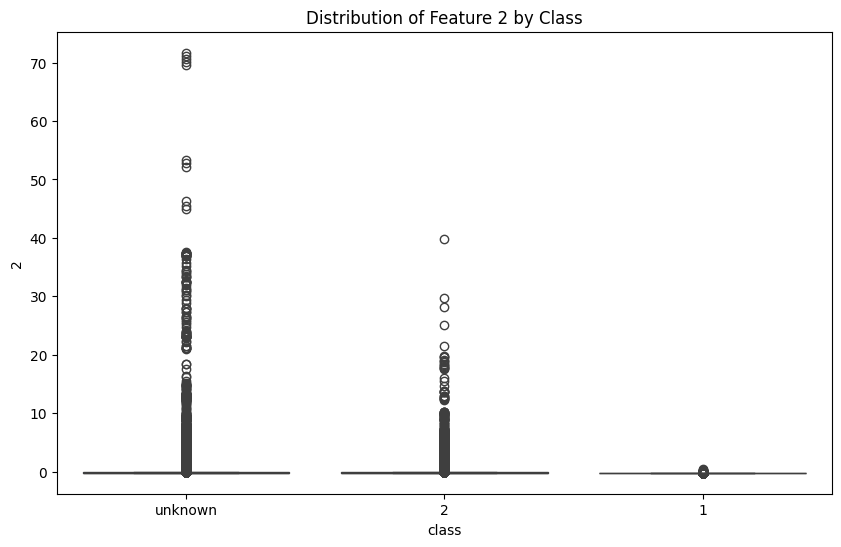

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature columns (integer column names)
feature_columns = [col for col in merged_df.columns if isinstance(col, int)]

# Pick the first feature
feature_to_plot = feature_columns[0]

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='class', y=feature_to_plot)
plt.title(f"Distribution of Feature {feature_to_plot} by Class")
plt.show()


In [18]:
print(filtered_df['class'].value_counts())


Series([], Name: count, dtype: int64)


In [19]:
# Check unique class values
print("Class column unique values:", merged_df['class'].unique())

# Remove 'unknown' rows
filtered_df = merged_df[merged_df['class'].isin(['licit', 'illicit'])]

# Check class balance
filtered_df['class'].value_counts()


Class column unique values: ['unknown' '2' '1']


,count
class,


In [23]:
# Select integer feature columns (from 2 to 166) — skip txId and time_step
feature_cols = [col for col in filtered_df.columns if isinstance(col, int)]

# Select only the first 20 features
selected_features = feature_cols[:20]


In [26]:
# Check if there are NaNs in y
print(y.isna().sum())


46564


In [27]:
# Drop rows where y is NaN (and corresponding rows in X)
X = X[~y.isna()]
y = y[~y.isna()]


In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


RandomForestClassifier(random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Merge data
merged_df = pd.merge(features_df, classes_df, on='txId')
X = merged_df.drop(columns=['txId', 'time_step', 'class']).fillna(0)
y = merged_df['class']

# Encode target
y = y.map({'unknown': -1, 'licit': 0, 'illicit': 1})  # optional

# Fit model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot importances
importances = pd.Series(rf.feature_importances_).sort_values(ascending=False)[:20]
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title("Top 20 Feature Importances")
plt.show()


ValueError: Input y contains NaN.

In [30]:
# Step 1: Check how many NaNs are in y
print("NaNs in y:", y.isna().sum())

# Step 2: Remove rows where y is NaN (and matching X rows)
valid_indices = ~y.isna()
X = X[valid_indices]
y = y[valid_indices]

# Step 3: (Optional) Recheck
print("NaNs in y after cleaning:", y.isna().sum())

# Step 4: (Optional) Encode y if it's categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Step 5: Fit model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


NaNs in y: 46564
NaNs in y after cleaning: 0


RandomForestClassifier(random_state=42)

In [33]:
print("Original merged_df shape:", merged_df.shape)
print("Unique classes in merged_df:", merged_df['class'].unique())

# After dropping NaNs in class
temp_df = merged_df.dropna(subset=['class'])
print("Shape after dropping NaNs in class:", temp_df.shape)
print("Unique classes after dropping NaNs:", temp_df['class'].unique())

# After filtering to only 'licit' and 'illicit'
filtered_df = temp_df[temp_df['class'].isin(['licit', 'illicit'])]
print("Shape after filtering to licit and illicit:", filtered_df.shape)
print("Unique classes after filtering:", filtered_df['class'].unique())


Original merged_df shape: (203769, 168)
Unique classes in merged_df: ['unknown' '2' '1']
Shape after dropping NaNs in class: (203769, 168)
Unique classes after dropping NaNs: ['unknown' '2' '1']
Shape after filtering to licit and illicit: (0, 168)
Unique classes after filtering: []


In [34]:
print(merged_df['class'].value_counts(dropna=False))


class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64


In [35]:
filtered_df = merged_df.dropna(subset=['class'])
print(filtered_df['class'].value_counts())


class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64


In [36]:
print("Unique classes and counts:")
print(merged_df['class'].value_counts(dropna=False))


Unique classes and counts:
class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64


In [39]:
# Check shape and classes before filtering
print("Original merged_df shape:", merged_df.shape)
print("Class value counts (including NaNs):")
print(merged_df['class'].value_counts(dropna=False))

# Filter for class in [1,2]
df_filtered = merged_df[merged_df['class'].isin([1, 2])]
print("Filtered df shape:", df_filtered.shape)

# List all columns
print("Columns:", df_filtered.columns.tolist())

# Check if any rows exist at all
if df_filtered.shape[0] == 0:
    print("No rows with class 1 or 2 found! Please verify your data.")
else:
    # Check columns that you want to drop
    exclude_cols = ['txId', 'time_step', 'class']
    feature_cols = [col for col in df_filtered.columns if col not in exclude_cols]

    # Prepare X and y
    X = df_filtered[feature_cols].fillna(0)
    y = df_filtered['class']

    print("X shape:", X.shape)
    print("y shape:", y.shape)
    print("Unique classes in y:", y.unique())


Original merged_df shape: (203769, 168)
Class value counts (including NaNs):
class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64
Filtered df shape: (0, 168)
Columns: ['txId', 'time_step', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 'class']
No rows with class 1 or 2 found! Please verify you

In [40]:
df_filtered = merged_df[merged_df['class'].isin(['1', '2'])].copy()
print("Filtered df shape:", df_filtered.shape)
print("Class counts after filtering:")
print(df_filtered['class'].value_counts())


Filtered df shape: (46564, 168)
Class counts after filtering:
class
2    42019
1     4545
Name: count, dtype: int64


In [41]:
df_filtered['class_label'] = df_filtered['class'].map({'1': 'illicit', '2': 'licit'})


In [42]:
# Step 1: Confirm types in class column
print("Unique class values and types:")
print(merged_df['class'].apply(type).value_counts())

# Step 2: Filter rows with class '1' or '2' as strings
df_filtered = merged_df[merged_df['class'].isin(['1', '2'])].copy()
print("Filtered df shape:", df_filtered.shape)
print(df_filtered['class'].value_counts())

# Step 3: Map class labels
df_filtered['class_label'] = df_filtered['class'].map({'1': 'illicit', '2': 'licit'})

# Step 4: Prepare X and y
exclude_cols = ['txId', 'time_step', 'class', 'class_label']
feature_cols = [col for col in df_filtered.columns if col not in exclude_cols]

X = df_filtered[feature_cols].fillna(0)
y = df_filtered['class_label']

# Step 5: Encode y and check
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Classes:", le.classes_)
print("X shape:", X.shape)
print("y_encoded shape:", y_encoded.shape)

# Step 6: Fit RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y_encoded)


Unique class values and types:
class
<class 'str'>    203769
Name: count, dtype: int64
Filtered df shape: (46564, 168)
class
2    42019
1     4545
Name: count, dtype: int64
Classes: ['illicit' 'licit']
X shape: (46564, 165)
y_encoded shape: (46564,)


RandomForestClassifier(random_state=42)

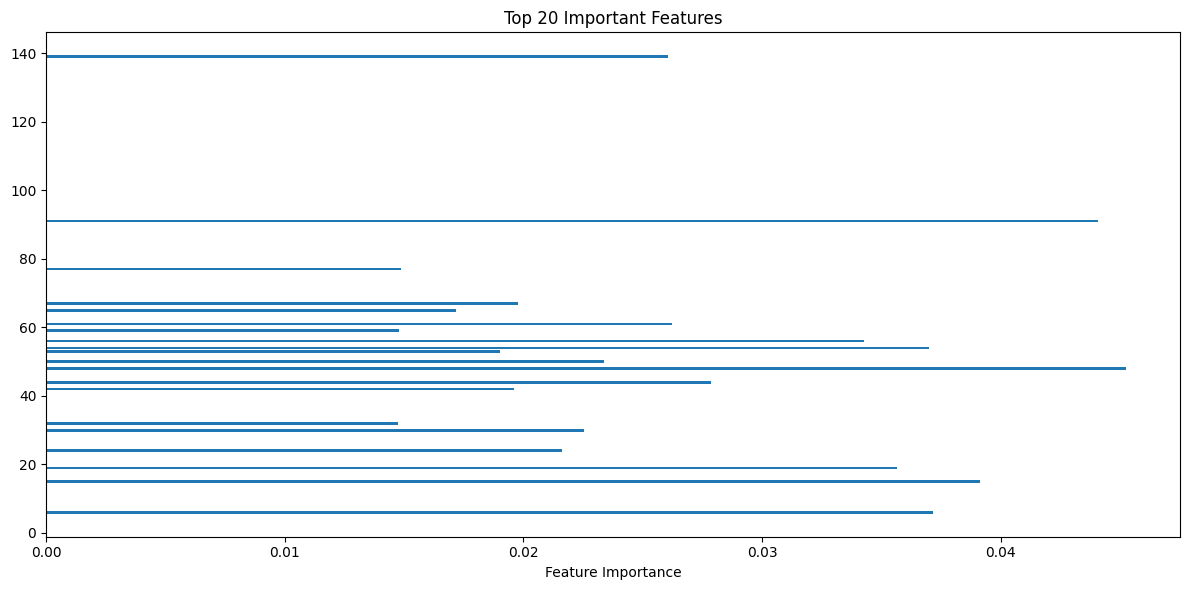

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top20 = feature_importance_df.head(20)

plt.figure(figsize=(12, 6))
plt.barh(top20['Feature'][::-1], top20['Importance'][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features")
plt.tight_layout()
plt.show()


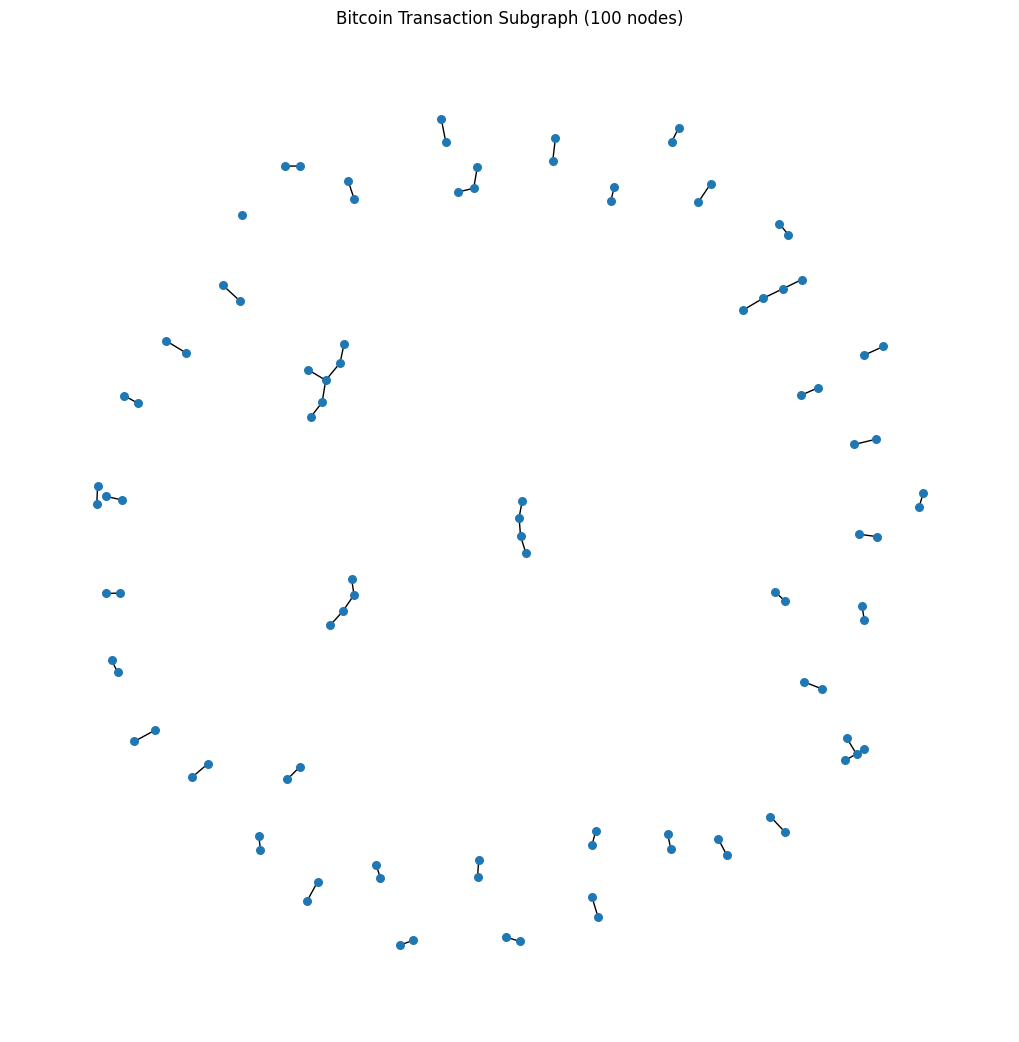

In [44]:
import networkx as nx

# Create a graph from the edgelist
G = nx.from_pandas_edgelist(edgelist_df, source='source_txId', target='target_txId')

# Draw a subgraph (only 100 nodes for clarity)
subgraph = G.subgraph(list(G.nodes)[:100])
plt.figure(figsize=(10, 10))
nx.draw(subgraph, with_labels=False, node_size=30)
plt.title("Bitcoin Transaction Subgraph (100 nodes)")
plt.show()
